In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
dataset = pd.read_csv('Datasets/feature_dataset.csv')

dataset = dataset.reset_index()

col_names = [ 
    "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
    "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
    "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
    "Head2Head Draw", "Winner"
]

dataset = dataset[col_names]
dataset.head()

,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Head2Head Win,Head2Head Draw,Winner
0,1676,1521,54.21,33.84,40.90,55.94,64.50,20.64,29.82,28.95,0,0,-1
1,1485,1520,38.63,37.45,53.75,51.46,24.01,26.97,26.52,25.10,0,0,0
2,1462,1692,48.21,44.89,56.39,46.18,27.27,29.22,36.44,28.54,0,0,0
3,1509,1680,46.69,57.40,52.39,57.04,32.51,25.29,39.62,25.83,0,0,-1
4,1420,1434,45.73,65.26,32.79,46.99,30.42,24.58,21.05,26.32,0,0,-1


Accuracy: 0.5789473684210527

Feature Weights for Logistic Regression:
Home Team ELO: 3.720625193415195e-05
Away Team ELO: 5.4214426411138956e-05
Home XG: -0.017078502859052772
Away XG: 0.013740831261353234
Home XGA: 0.02049833353675134
Away XGA: -0.016281013748921696
Home Win Percentage: -0.009680018047721192
Home Draw Percentage: 0.005521155231769534
Away Win Percentage: 0.0011884112711746757
Away Draw Percentage: -0.009637748629669747
Head2Head Win: 0.005009458455213024
Head2Head Draw: -0.0018690191564982176


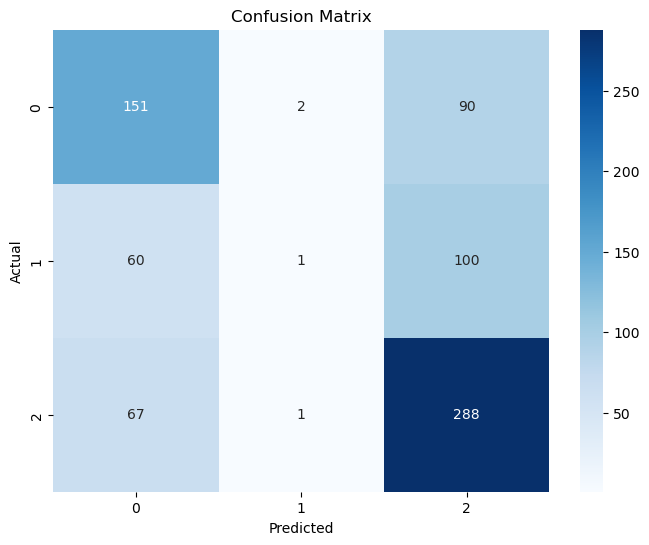

In [32]:
X = dataset.drop('Winner', axis=1)
y = dataset['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression(random_state=16, max_iter=10000, solver='saga')

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

feature_weights = logistic_regression_model.coef_[0]
features = X.columns


print("\nFeature Weights for Logistic Regression:")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM Accuracy: 0.5842105263157895

Feature Weights for SVM (Linear Kernel):
Home Team ELO: -0.00010906119699955322
Away Team ELO: 2.7215434243643366e-05
Home XG: -0.009287549703110153
Away XG: 0.007774458958850138
Home XGA: 0.012342057798276596
Away XGA: -0.010474251657914904
Home Win Percentage: -0.004878173125361092
Home Draw Percentage: 0.0010325161614967234
Away Win Percentage: 0.0008312968214470234
Away Draw Percentage: -0.007660306115992769
Head2Head Win: 0.0027925868761696023
Head2Head Draw: -0.0011566913442447356


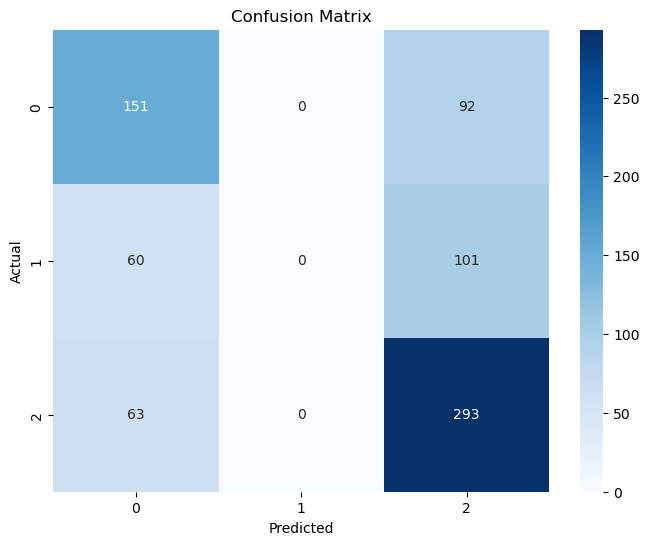

In [33]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear SVM model
svm_model = LinearSVC(random_state=16, max_iter=10000)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

# Get feature weights from Linear SVM
feature_weights = svm_model.coef_[0]
features = X.columns

print("\nFeature Weights for SVM (Linear Kernel):")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.6052631578947368

Feature Importances:
                 Feature  Importance
3                Away XG    0.151735
4               Home XGA    0.146545
0          Home Team ELO    0.113274
1          Away Team ELO    0.112888
5               Away XGA    0.075739
8    Away Win Percentage    0.074053
9   Away Draw Percentage    0.073390
6    Home Win Percentage    0.055261
7   Home Draw Percentage    0.054543
2                Home XG    0.053657
10         Head2Head Win    0.047140
11        Head2Head Draw    0.041776


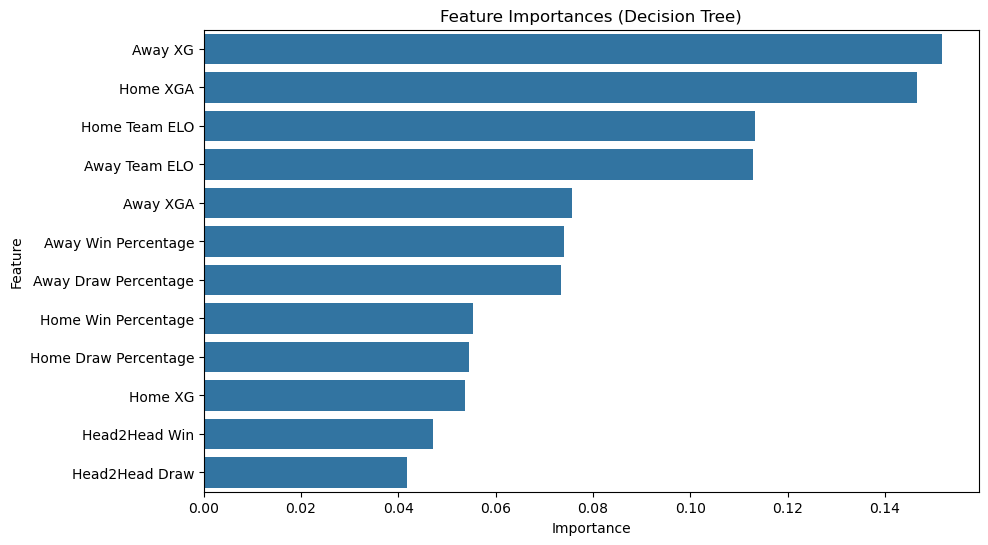

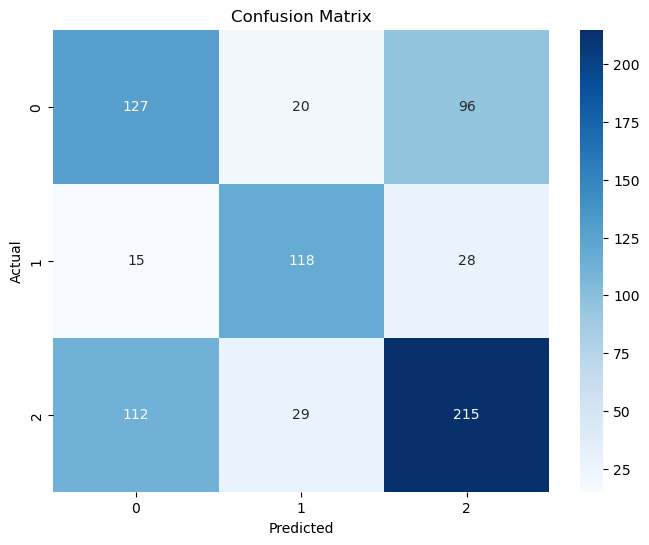

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=16)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_
features = X.columns

# Display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.show()

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.6855263157894737
Random Forest F1 Score: 0.6849764198802019

Random Forest Feature Importances:
                 Feature  Importance
3                Away XG    0.139144
4               Home XGA    0.137042
1          Away Team ELO    0.097420
0          Home Team ELO    0.090654
8    Away Win Percentage    0.086449
6    Home Win Percentage    0.081229
2                Home XG    0.078858
5               Away XGA    0.076312
9   Away Draw Percentage    0.067509
7   Home Draw Percentage    0.066723
10         Head2Head Win    0.040270
11        Head2Head Draw    0.038390


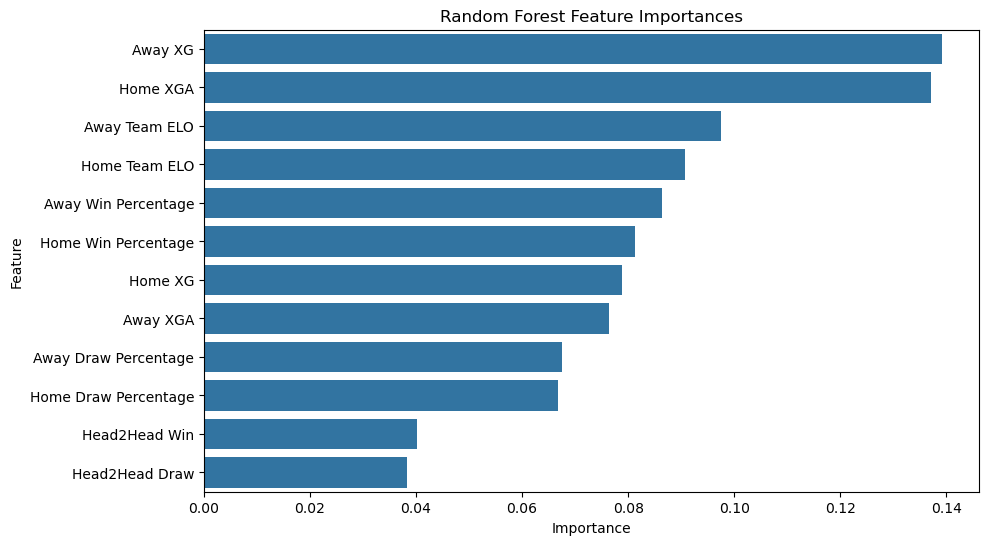

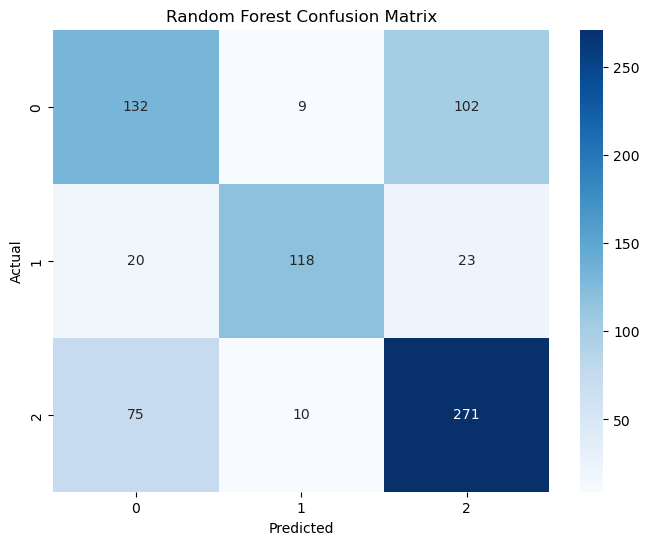

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=16, n_estimators=2000)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # 'weighted' accounts for class imbalance
print('Random Forest F1 Score:', f1_rf)

# Get feature importances
feature_importances_rf = random_forest_model.feature_importances_
features = X.columns

# Display feature importances
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df_rf)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Random Forest Feature Importances')
plt.show()

# Confusion matrix for Random Forest
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [86]:
team2 = "Liverpool"
team1 = "Arsenal"

# col_names = [ 
#     "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
#     "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
#     "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
#     "Head2Head Draw", "Winner"
# ]

elo_dataset = pd.read_csv('Datasets/Team Stats/ELO_Team_Ratings.csv')
home_team_elo = elo_dataset[elo_dataset['Team'] == team1]['Rating'].values[0]
away_team_elo = elo_dataset[elo_dataset['Team'] == team2]['Rating'].values[0]

xg_dataset = pd.read_csv('Datasets/Team Stats/XG_Team_Ratings.csv')
home_team_xg = xg_dataset[xg_dataset['Team'] == team1]['xG'].values[0]
away_team_xg = xg_dataset[xg_dataset['Team'] == team2]['xG'].values[0]
home_team_xga = xg_dataset[xg_dataset['Team'] == team1]['xGA'].values[0]
away_team_xga = xg_dataset[xg_dataset['Team'] == team2]['xGA'].values[0]

percentage_dataset = pd.read_csv('Datasets/Team Stats/team_stats.csv')
home_win_percentage = percentage_dataset[percentage_dataset['Team'] == team1]['Win Percentage'].values[0]
home_draw_percentage = percentage_dataset[percentage_dataset['Team'] == team1]['Draw Percentage'].values[0]
away_win_percentage = percentage_dataset[percentage_dataset['Team'] == team2]['Win Percentage'].values[0]
away_draw_percentage = percentage_dataset[percentage_dataset['Team'] == team2]['Draw Percentage'].values[0]

head2head_dataset = pd.read_csv('Datasets/Team Stats/Head2Head.csv')
# Ensure each condition is enclosed in parentheses
head2head_win = head2head_dataset[(head2head_dataset['Home'] == team1) & (head2head_dataset['Away'] == team2)]['Win Percentage'].values[0]
head2head_draw = head2head_dataset[(head2head_dataset['Home'] == team1) & (head2head_dataset['Away'] == team2)]['Draw Percentage'].values[0]

entry = [home_team_elo, away_team_elo, home_team_xg, away_team_xg, home_team_xga, away_team_xga, home_win_percentage, home_draw_percentage, away_win_percentage, away_draw_percentage, head2head_win, head2head_draw]

entry_df = pd.DataFrame([entry], columns=X.columns)

# Step 5: Make a prediction using the trained classifier
predicted_result = random_forest_model.predict(entry_df)

print(f"The predicted result of the match between {team1} and {team2} is: {predicted_result[0]}")


The predicted result of the match between Arsenal and Liverpool is: 0
